<a href="https://colab.research.google.com/github/Rashilajayasinghe/Customer-Churn-Prediction/blob/main/churnpredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mp

In [ ]:
data = pd.read_csv("/content/sample_data/Telco.csv")

In [ ]:
data2 = data.copy()

In [ ]:
print(data.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [ ]:
X = data.drop('Churn', axis=1)
Y = data['Churn']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

# Decision Tree

Decision Tree without SMOTE


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid_dtc = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None], # None means no limit
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced' , None ]
}

# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=5)

# Initialize GridSearchCV
grid_search_dtc = GridSearchCV(dtc,
                               param_grid_dtc,
                               cv=5, # Using 5-fold cross-validation
                               scoring='roc_auc',
                               n_jobs=-1) # Use all available cores

print("Running GridSearchCV for Decision Tree Classifier...")
# Fit GridSearchCV on the training data
grid_search_dtc.fit(X_train, y_train)

# Get the best estimator
best_dtc = grid_search_dtc.best_estimator_

print("Best parameters found:", grid_search_dtc.best_params_)
print("Best cross-validation accuracy:", grid_search_dtc.best_score_)


Running GridSearchCV for Decision Tree Classifier...
Best parameters found: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validation accuracy: 0.8294509207176578


In [ ]:
#Make predictions on the training and test data using the best estimator
y_pred_train = best_dtc.predict(X_train)
y_pred = best_dtc.predict(X_test)

# Calculate and print the accuracy score
accuracy_test_dtc = accuracy_score(y_test, y_pred)
accuracy_train_dtc = accuracy_score(y_train, y_pred_train)
print(f"\nTest Accuracy (Best DTC): {accuracy_test_dtc:.4f}")
print(f"Train Accuracy (Best DTC): {accuracy_train_dtc:.4f}")

# Display the classification report
print("\nClassification Report (testing Best DTC):")
print(classification_report(y_test, y_pred))
print("\nClassification Report (training Best DTC):")
print(classification_report(y_train, y_pred_train))


Test Accuracy (Best DTC): 0.7818
Train Accuracy (Best DTC): 0.8039

Classification Report (testing Best DTC):
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       999
           1       0.64      0.57      0.60       408

    accuracy                           0.78      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.78      0.78      1407


Classification Report (training Best DTC):
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4164
           1       0.64      0.57      0.60      1461

    accuracy                           0.80      5625
   macro avg       0.75      0.73      0.74      5625
weighted avg       0.80      0.80      0.80      5625



Resampling Using SMOTE Decision Tree

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=0.8, random_state=5)
x_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

print("Running GridSearchCV for SMOTE Decision Tree Classifier...")
# Fit GridSearchCV on the training data
grid_search_dtc.fit(x_resampled, y_resampled)

# Get the best estimator
best_dtc_smote = grid_search_dtc.best_estimator_

print("Best parameters found:", grid_search_dtc.best_params_)
print("Best cross-validation accuracy:", grid_search_dtc.best_score_)


Running GridSearchCV for SMOTE Decision Tree Classifier...
Best parameters found: {'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation accuracy: 0.8820265056823576


In [ ]:
# Make predictions on the test data
y_pred_train = best_dtc_smote.predict(x_resampled)
y_pred = best_dtc_smote.predict(X_test)

# Calculate and print the accuracy score
accuracy_test_dtc_smote = accuracy_score(y_test, y_pred)
accuracy_train_dtc_smote = accuracy_score(y_resampled, y_pred_train)
print(f"Test Accuracy: {accuracy_test_dtc_smote:.4f}")
print(f"Train Accuracy: {accuracy_train_dtc_smote:.4f}")

# Display the classification report
print("\nClassification Report(testing):")
print(classification_report(y_test,y_pred))
print("\nClassification Report(training):")
print(classification_report(y_resampled,y_pred_train))

Test Accuracy: 0.7683
Train Accuracy: 0.8374

Classification Report(testing):
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       999
           1       0.59      0.64      0.62       408

    accuracy                           0.77      1407
   macro avg       0.72      0.73      0.73      1407
weighted avg       0.77      0.77      0.77      1407


Classification Report(training):
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4164
           1       0.81      0.82      0.82      3331

    accuracy                           0.84      7495
   macro avg       0.84      0.84      0.84      7495
weighted avg       0.84      0.84      0.84      7495



## Data Preprocessing for ANN (Feature Scaling)


In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])


In [ ]:
X2 = data.drop('Churn',axis='columns')
y2 = data['Churn']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.4,random_state=5)

In [ ]:
X2_train.shape

(4219, 26)

In [ ]:
X2_test.shape

(2813, 26)

## Building the ANN Model

In [ ]:
#MLPClassifier for neural network implemetation
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np


print("Training the model...")
param_grid = {
    'hidden_layer_sizes': [(50,), (50,25),(100,50)],
    'activation': ['relu','tanh'],
    'alpha':[0.0001,0.001,0.01],
    'max_iter':[100,200,300],
    'solver': ['adam']
}
mlp_model = MLPClassifier(random_state=5,early_stopping=True)
grid_search_ann = GridSearchCV(mlp_model,
                           param_grid,
                           cv=3,              # Use 3-fold cross-validation
                           scoring='roc_auc',
                           n_jobs=-1            # Use all available processors
                           )
grid_search_ann.fit(X2_train, y2_train)

print("Best parameters found: ", grid_search_ann.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search_ann.best_score_))

Training the model...
Best parameters found:  {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'max_iter': 100, 'solver': 'adam'}
Best cross-validation score: 0.8427


## Evaluating the ANN Model


In [ ]:
yp = grid_search_ann.best_estimator_.predict(X2_test)
yp[:5]

array([0, 0, 0, 1, 0])

In [ ]:
yp[:10]

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [ ]:
y2_test[:10]

,Churn
2655,0
743,0
5570,1
64,1
3282,1
814,1
2665,0
5911,0
1020,0
6078,0


ANN Without SMOTE

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

best_ann = grid_search_ann.best_estimator_

# Predict
y_pred_train = best_ann.predict(X2_train)
y_pred = best_ann.predict(X2_test)   # <-- FIXED

# Accuracy
accuracy_test_ann = accuracy_score(y2_test, y_pred)
accuracy_train_ann = accuracy_score(y2_train, y_pred_train)

print(f"Test Accuracy: {accuracy_test_ann:.4f}")
print(f"Train Accuracy: {accuracy_train_ann:.4f}")

# Classification Reports
print("\nClassification Report (Testing):")
print(classification_report(y2_test, y_pred))

print("\nClassification Report (Training):")
print(classification_report(y2_train, y_pred_train))


Test Accuracy: 0.7903
Train Accuracy: 0.8139

Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2023
           1       0.66      0.53      0.59       790

    accuracy                           0.79      2813
   macro avg       0.74      0.71      0.72      2813
weighted avg       0.78      0.79      0.78      2813


Classification Report (Training):
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3140
           1       0.67      0.54      0.60      1079

    accuracy                           0.81      4219
   macro avg       0.76      0.72      0.74      4219
weighted avg       0.80      0.81      0.81      4219



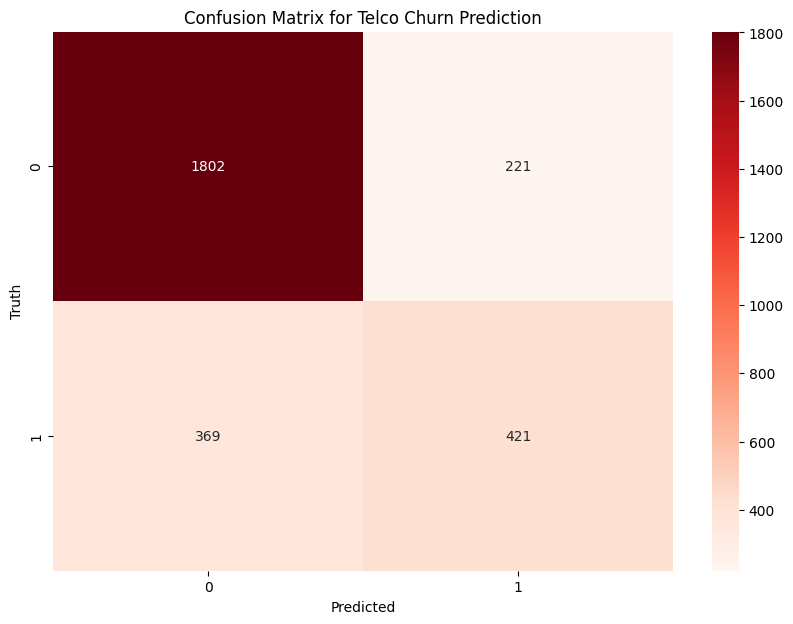

In [ ]:
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix # Import confusion_matrix

# NOTE: Using the sklearn function 'confusion_matrix' which takes labels first, predictions second.
cm = confusion_matrix(y2_test, y_pred)

plt.figure(figsize = (10,7))
# fmt='d' ensures the numbers are displayed as integers
# Added cmap='Blues' for better visual distinction
sn.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Telco Churn Prediction')
plt.show()

ANN Resampling Using SMOTE

In [ ]:

#APPLY SMOTE on the **scaled** training data
sm = SMOTE(sampling_strategy=0.8, random_state=5)
x_resampled_ann, y_resampled_ann = sm.fit_resample(X2_train, y2_train)



In [ ]:
print("Shapes after SMOTE:")
print("X2_resampled:", x_resampled_ann.shape)
print("y2_resampled:", y_resampled_ann.shape)


Shapes after SMOTE:
X2_resampled: (5652, 26)
y2_resampled: (5652,)


In [ ]:
X2_test.shape

(2813, 26)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (50,25), (100,50)],
    'activation': ['relu','tanh'],
    'alpha': [0.0001,0.001,0.01],
    'max_iter': [100,200,300],
    'solver': ['adam']
}

mlp_model = MLPClassifier(random_state=5, early_stopping=True)

grid_search_ann_smote = GridSearchCV(
    mlp_model,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

print("Training ANN with SMOTE...")
grid_search_ann_smote.fit(x_resampled_ann, y_resampled_ann)

print("Best parameters:", grid_search_ann_smote.best_params_)
print("Best CV Score:", grid_search_ann_smote.best_score_)



Training ANN with SMOTE...
Best parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 25), 'max_iter': 100, 'solver': 'adam'}
Best CV Score: 0.7912243453644727


In [ ]:
y_pred2 = grid_search_ann_smote.best_estimator_.predict(X_test)
y_pred2[:10]  #predicted test set

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
y2_test[:10] #orginal test set

,Churn
2655,0
743,0
5570,1
64,1
3282,1
814,1
2665,0
5911,0
1020,0
6078,0


In [ ]:

best_ann_smote = grid_search_ann_smote.best_estimator_

# Predict
y_pred_train = best_ann_smote.predict(x_resampled_ann)
y_pred = best_ann_smote.predict(X2_test)

# Calculate and print the accuracy score
accuracy_test_ann_smote = accuracy_score(y2_test, y_pred)
accuracy_train_ann_smote = accuracy_score(y_resampled_ann, y_pred_train)
print(f"Test Accuracy: {accuracy_test_ann_smote:.4f}")
print(f"Train Accuracy: {accuracy_train_ann_smote:.4f}")

# Display the classification report
print("\nClassification Report(testing):")
print(classification_report(y2_test,y_pred))
print("\nClassification Report(training):")
print(classification_report(y_resampled_ann,y_pred_train))

Test Accuracy: 0.7600
Train Accuracy: 0.8073

Classification Report(testing):
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      2023
           1       0.56      0.73      0.63       790

    accuracy                           0.76      2813
   macro avg       0.72      0.75      0.73      2813
weighted avg       0.79      0.76      0.77      2813


Classification Report(training):
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      3140
           1       0.77      0.81      0.79      2512

    accuracy                           0.81      5652
   macro avg       0.81      0.81      0.81      5652
weighted avg       0.81      0.81      0.81      5652



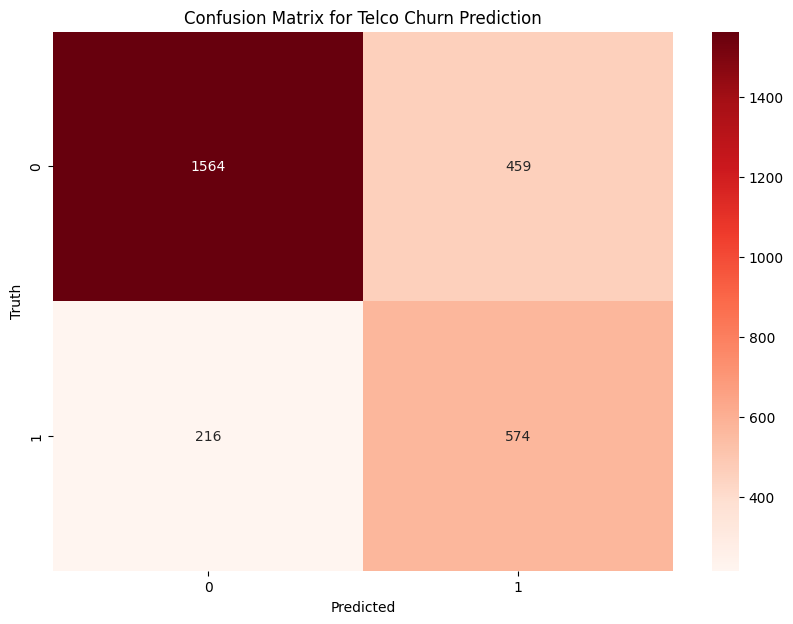

In [ ]:
cm = confusion_matrix(y2_test, y_pred)

plt.figure(figsize = (10,7))
# fmt='d' ensures the numbers are displayed as integers
# Added cmap='Blues' for better visual distinction
sn.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Telco Churn Prediction')
plt.show()

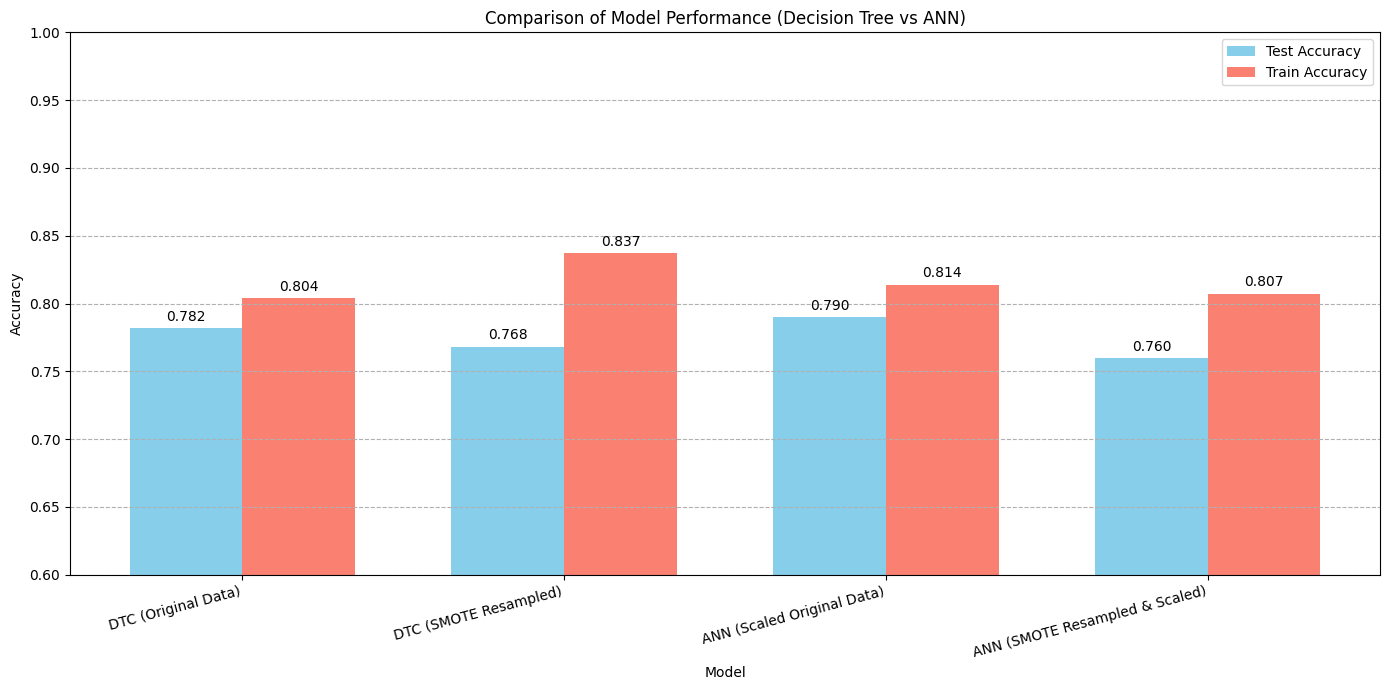

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_names = [
    'DTC (Original Data)',
    'DTC (SMOTE Resampled)',
    'ANN (Scaled Original Data)',
    'ANN (SMOTE Resampled & Scaled)'
]

# These values are taken from the previous cell outputs
test_accuracies = [
    accuracy_test_dtc,
    accuracy_test_dtc_smote,
    accuracy_test_ann,
    accuracy_test_ann_smote
]

train_accuracies = [
    accuracy_train_dtc,
    accuracy_train_dtc_smote,
    accuracy_train_ann,
    accuracy_train_ann_smote
]

x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(14,7))
rects1 = plt.bar(x - width/2, test_accuracies, width, label='Test Accuracy', color='skyblue')
rects2 = plt.bar(x + width/2, train_accuracies, width, label='Train Accuracy', color='salmon')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Performance (Decision Tree vs ANN)')
plt.xticks(x, model_names, rotation=15, ha='right')
plt.ylim(0.6, 1.0)
plt.grid(axis='y', linestyle='--')
plt.legend()

def autolabel(rects, accuracies):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        plt.annotate(f'{accuracies[i]:.3f}',
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(rects1, test_accuracies)
autolabel(rects2, train_accuracies)

plt.tight_layout()
plt.show()

In [ ]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7028,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7029,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7030,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


OUTPUT THE BEST_MODEL

In [ ]:
import pickle

# Assuming the 'model' variable currently holds the highest accuracy ANN model
# You might want to rename it if you have multiple models in scope
filename = 'highest_accuracy_ann_model.pkl'
pickle.dump(best_ann, open(filename, 'wb'))

print(f"Model saved successfully as {filename}")

Model saved successfully as highest_accuracy_ann_model.pkl


In [ ]:
print('Model Summary:')
print(best_ann)


Model Summary:
MLPClassifier(activation='tanh', alpha=0.001, early_stopping=True,
              hidden_layer_sizes=(100, 50), max_iter=100, random_state=5)


### Load the Saved Model

First, you need to load the model from the `.pkl` file you saved earlier using `pickle`.

In [ ]:
import pickle

filename = 'highest_accuracy_ann_model.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

print(f"Model '{filename}' loaded successfully.")

Model 'highest_accuracy_ann_model.pkl' loaded successfully.


### Make Predictions and Evaluate

Now, you can use the `loaded_model` to make predictions on your test data (`xr_test2`) and evaluate its performance. Remember that `xr_test2` already contains preprocessed data (scaled and resampled), matching the format the model expects.

In [ ]:
import pandas as pd

# Assuming 'scaler' is still available from the previous MinMax scaling step (cell b9675d25)
# If not, you would need to reload or re-instantiate it if you saved it separately.

# Example of new data (ensure column order and types match your training data)
# This is just a placeholder, replace with your actual new data
new_customer_data = pd.DataFrame([
    {
        'gender': 0, 'SeniorCitizen': 0, 'Partner': 1, 'Dependents': 0,
        'tenure': 1, 'PhoneService': 0, 'MultipleLines': 0, 'OnlineSecurity': 0,
        'OnlineBackup': 1, 'DeviceProtection': 0, 'TechSupport': 0, 'StreamingTV': 0,
        'StreamingMovies': 0, 'PaperlessBilling': 1, 'MonthlyCharges': 29.85,
        'TotalCharges': 29.85, 'InternetService_DSL': 1, 'InternetService_Fiber optic': 0,
        'InternetService_No': 0, 'Contract_Month-to-month': 1, 'Contract_One year': 0,
        'Contract_Two year': 0, 'PaymentMethod_Bank transfer (automatic)': 0,
        'PaymentMethod_Credit card (automatic)': 0, 'PaymentMethod_Electronic check': 1,
        'PaymentMethod_Mailed check': 0
    }
])

# Ensure the columns are in the same order as X_train, which was derived from data2
# Get the column order from your original preprocessed data (e.g., data2.drop('Churn', axis=1).columns)
expected_columns = X.columns # X was derived from data2.drop('Churn', axis=1)
new_customer_data = new_customer_data[expected_columns]

# Apply the same scaling to the numerical columns of the new data
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
new_customer_data[cols_to_scale] = scaler.transform(new_customer_data[cols_to_scale])

# Use the loaded model to make a prediction
# Use predict_proba to get probabilities for each class
prediction_proba_raw = loaded_model.predict_proba(new_customer_data)

# The probability of churn (class 1) is in the second column
prediction_prob = prediction_proba_raw[0][1]
prediction_binary = (prediction_prob > 0.5).astype(int)

print(f"New customer data:\n{new_customer_data}")
print(f"Prediction probability: {prediction_prob:.4f}")
print(f"Predicted churn (0=No, 1=Yes): {prediction_binary}")

New customer data:
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0     0.0             0   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0                   0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  

[1 rows x 26 columns]
Prediction probability: 0.5259
Predicted churn (0=No, 1=Yes): 1
